![Ironhack logo](https://i.imgur.com/1QgrNNw.png)
# LAB | Statistics Visualization

## Introduction
We'll use the datasets to have a deeper understanding of some important variable distributions.

We'll understand how to:
- have a glance on the statistics distribution just by observing the main statistical numerical description of our dataset.
- understand the effect of a normal and non-normal distribution on our outlier analysis
- understand how one variable can impact on another variable distribution

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset from `weight-height-money.csv`.

Take a look at the first rows of the dataset.

In [4]:
# your answer here
df = pd.read_csv('data/weight-height-money.csv')
df.head()

Gender     Height      Weight       Money
0   Male  73.847017  241.893563   21.462754
1   Male  68.781904  162.310473   94.732358
2   Male  74.110105  212.740856  130.077362
3   Male  71.730978  220.042470  214.096064
4   Male  69.881796  206.349801  765.091245

## Use the describe method to understand the data.

In [6]:
# your answer here
df.describe().T

count        mean         std           min         25%         50%  \
Height  10000.0   66.367560    3.847528  5.426313e+01   63.505620   66.318070   
Weight  10000.0  161.440357   32.108439  6.470013e+01  135.818051  161.212928   
Money   10000.0  631.156464  806.048057  1.735664e-07   89.067202  339.087164   

               75%          max  
Height   69.174262    78.998742  
Weight  187.169525   269.989699  
Money   851.540411  8168.216190

## What can you observe? Compare mean and median values for each variable of our dataset.

Weight and Height have mean and median very close, the mean just a little bit higher than median.
Money, on the other hand, have very divergent values of mean and median. The mean is almost the double of the mean, which means that probably it has some high values outliers, distorting the mean for a higher value than most of the sample.

## From that observation, what can you conclude? Can you imagine which kind of distribution each one has?

Try to predict which category each variable most likely seems to fall into (without plotting it yet):
- Left skewed
- Right skewed
- Gaussian-like

_hint: Remember the effect of outliers on the mean and median values. Usually, the comparison between mean and median already leads us to meaningful insights regarding the variable's distribution. If mean and median are close, you can suppose that most of the data is concentrated in a region within the mean. However, if median and mean are far apart, you can suppose that some observations are pulling the mean closer to them._

- Height seems to be more Gaussian-like, as the first and third quartiles are aproximatelly one std deviation apart from the median, and min and max values about 3 standards deviations apart from the median.

- Weight, as the Height, also seem to be Gaussian-like.

- Money seems to be right-skewed, as the mean is much higher than median, and the relation of standard deviation and quartiles does not follow the Gaussian distribution.

# Univariate Analysis

## Gender count

Count how many Male and Female exist on this dataset using pandas. 

In [8]:
# your answer here
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

## Visual gender count

Use seaborn (sns) to visually see how many male and female exist on the dataset.

_hint: If you don't know how to do this, you can google: seaborn + the pandas method to count itens_

<AxesSubplot:xlabel='Gender', ylabel='count'>

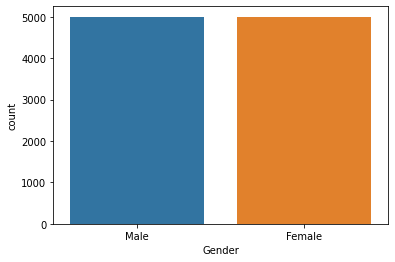

In [10]:
# your answer here
sns.countplot(x=df['Gender'])

## Consider only Height

Create a pandas series of the `height` variable.

In [13]:
# your answer here
s_height = df['Height']

### Histogram-plot

Plot the histogram of the `height`

<AxesSubplot:>

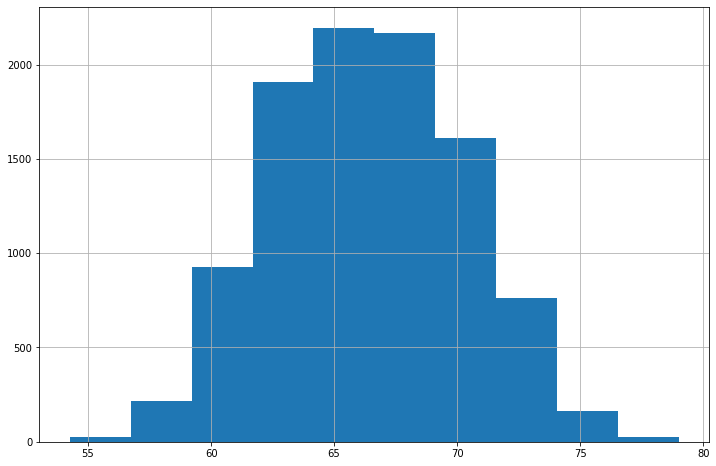

In [15]:
plt.figure(figsize=(12, 8))
# your answer here
s_height.hist()

### Box-plot

Plot the boxplot of the `height`

<AxesSubplot:>

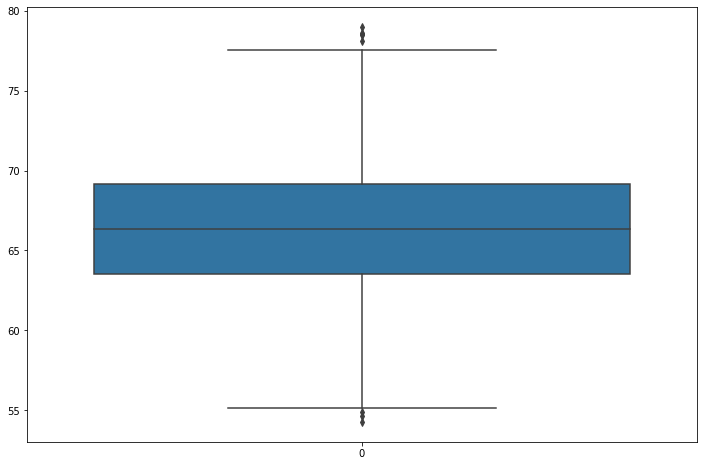

In [17]:
plt.figure(figsize=(12, 8))
# your answer here
sns.boxplot(data=s_height)

What do you think the distribution of `height` is like? Do you think it is common for variables to behave like that in real life?

The height bahaves like a normally distributed variable, as many nature variables and phenomena do. However, it does not happen to everything.

### KDE distribution for height

Plot the kde (kernel-density-estimation) distribution (without the hist distribution) of the `height`.

<AxesSubplot:xlabel='Height', ylabel='Density'>

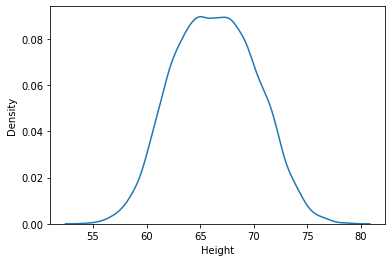

In [18]:
sns.kdeplot(data=s_height)

### Analysis

As we can see we have a high count for height in the range near 60 to 75. How many people fall off 3 standard deviations from the mean? Can you consider them outliers? Why is that?

#### Calculate the mean

In [22]:
# your answer here
height_mean = s_height.mean()
height_mean

66.36755975482124

#### Calculate the standard deviation 

In [24]:
# your answer here
height_std = s_height.std()
height_std

3.8475281207732284

#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

In [26]:
height_upper_cutoff = height_mean + 3*height_std
height_lower_cutoff = height_mean - 3*height_std
print(f'''lower cutoff: {height_lower_cutoff}
upper cutoff: {height_upper_cutoff}''')

lower cutoff: 54.82497539250156
upper cutoff: 77.91014411714093


#### Now filter the original dataset. 

Use the values you calculated above to filter the original dataset. 

You should obtain a filtered dataset containing only the rows in which the `Height` column is greater than the upper cutoff and lower than the lower cutoff.

In [33]:
# your answer here
df[(df['Height'] < height_lower_cutoff) | (df['Height'] > height_upper_cutoff)]

Gender     Height      Weight        Money
994     Male  78.095867  255.690835  1357.105000
1317    Male  78.462053  227.342565     5.457968
2014    Male  78.998742  269.989699   131.474470
3285    Male  78.528210  253.889004     0.089663
3757    Male  78.621374  245.733783   204.113245
6624  Female  54.616858   71.393749   226.061310
9285  Female  54.263133   64.700127   646.532185

Expected results:

|      | Gender   |   Height |   Weight |        Money |
|-----:|:---------|---------:|---------:|-------------:|
|  994 | Male     |  78.0959 | 255.691  | 1357.11      |
| 1317 | Male     |  78.4621 | 227.343  |    5.45797   |
| 2014 | Male     |  78.9987 | 269.99   |  131.474     |
| 3285 | Male     |  78.5282 | 253.889  |    0.0896631 |
| 3757 | Male     |  78.6214 | 245.734  |  204.113     |
| 6624 | Female   |  54.6169 |  71.3937 |  226.061     |
| 9285 | Female   |  54.2631 |  64.7001 |  646.532     |

#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value? Why?

In [38]:
# your answer here
df_height_filter = df[(df['Height'] < height_lower_cutoff) | (df['Height'] > height_upper_cutoff)]
df_height_filter.shape

(7, 4)

In [39]:
print(f'{len(df_height_filter)*100/len(df)} %')

0.07 %


It is a expected value, as the Height shows to be a normally distributed variable, and being so, less than 1% is to be expected to be out of the men +- 3 * std deviation.

## Now perform the same analysis for `money` variable.

You'll do exactly the same analysis for a variable of your dataset that has some different aspects. Let's try to understand that.

## Consider only Money

Create a pandas series of the `money` variable.

In [41]:
# your code here
s_money = df['Money']
s_money

0         21.462754
1         94.732358
2        130.077362
3        214.096064
4        765.091245
           ...     
9995     240.933121
9996    1220.781276
9997       0.258369
9998    1552.920529
9999    2232.337002
Name: Money, Length: 10000, dtype: float64

Shape

In [42]:
# your code here
s_money.shape

(10000,)

### Histogram-plot

<AxesSubplot:>

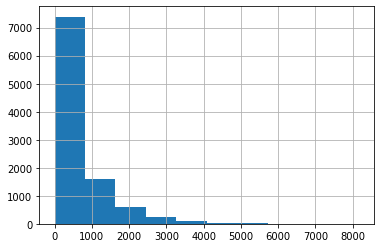

In [43]:
# your code here
s_money.hist()

### Box-plot

<AxesSubplot:>

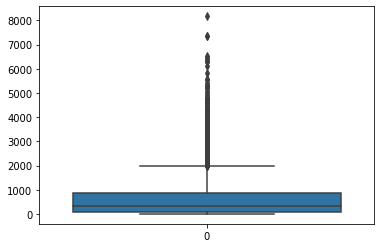

In [44]:
# your code here
sns.boxplot(data=s_money)

### KDE distribution for height

<AxesSubplot:xlabel='Money', ylabel='Density'>

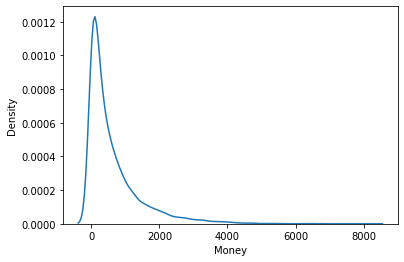

In [45]:
# your code here
sns.kdeplot(data=s_money)

### Analysis

Again, how many people fall off 3 standard deviations in both cases (which percentage of the dataset)? Let's do it by parts:

#### Calculate the mean

In [46]:
# your answer here
money_mean = s_money.mean()
money_mean

631.1564641555965

#### Calculate the standard deviation 

In [47]:
# your answer here.
money_std = s_money.std()
money_std

806.048057311861

#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

In [49]:
money_upper_cutoff = money_mean + 3* money_std
money_lower_cutoff = money_mean - 3* money_std
money_lower_cutoff, money_upper_cutoff

(-1786.9877077799865, 3049.3006360911795)

#### Again, filter the original dataset. 

Expected result:

|     | Gender   |   Height |   Weight |   Money |
|----:|:---------|---------:|---------:|--------:|
| 234 | Male     |  67.3698 |  176.636 | 3725.08 |
| 294 | Male     |  64.4252 |  169.109 | 3942.97 |
| 355 | Male     |  72.9386 |  216.097 | 3762.42 |
| 518 | Male     |  68.3465 |  178.676 | 3286.66 |
| 662 | Male     |  69.431  |  172.326 | 3798.71 |
|   ...   | ...   |   ... |   ... |   ... |
| 9873 | Female   |  63.7072 |  132.761 | 3164.37 |
| 9888 | Female   |  65.1059 |  149.695 | 3929.57 |
| 9922 | Female   |  58.7525 |  106.846 | 3541.68 |
| 9930 | Female   |  68.5444 |  148.828 | 3916.32 |
| 9946 | Female   |  66.6245 |  149.828 | 6535.36 |

In [50]:
# your answer here
df[(df['Money'] < money_lower_cutoff) | (df['Money'] > money_upper_cutoff)]

Gender     Height      Weight        Money
234     Male  67.369809  176.636164  3725.078083
294     Male  64.425194  169.109401  3942.967034
355     Male  72.938649  216.097455  3762.418909
518     Male  68.346457  178.675992  3286.659362
662     Male  69.430998  172.325881  3798.711723
...      ...        ...         ...          ...
9873  Female  63.707174  132.760922  3164.374960
9888  Female  65.105932  149.694693  3929.572877
9922  Female  58.752489  106.846041  3541.679543
9930  Female  68.544449  148.828165  3916.316217
9946  Female  66.624544  149.828094  6535.362439

[229 rows x 4 columns]

#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value?

In [51]:
# your answer here
df_money_filter = df[(df['Money'] < money_lower_cutoff) | (df['Money'] > money_upper_cutoff)]
df_money_filter.shape

(229, 4)

In [53]:
df[(df['Money'] < money_lower_cutoff)].shape

(0, 4)

In [54]:
df[(df['Money'] > money_upper_cutoff)].shape

(229, 4)

In [52]:
print(f'''{len(df_money_filter)*100/len(df)} %''')

2.29 %


Can you consider them outliers?

Yes, it is still a low percentage of the sample, and all of them belongs beyond the upper cuttoff and those are the elements that distorts the mean to a much higher value than the median.

By now, you should have observed that in order to consider an observation an `outlier`, one needs to take into account the **distribution** of the variable. In fact, most statistical aspects do not mean anything until you understand the variable's distribution.

# Bivariate Analysis

## Considering both height and weight

Now we'll consider both height and weight variables to understand our data. We'll perform what is called a bivariate analysis.

### Perform a scatterplot to check the relation between Height and Weight

<AxesSubplot:xlabel='Height', ylabel='Weight'>

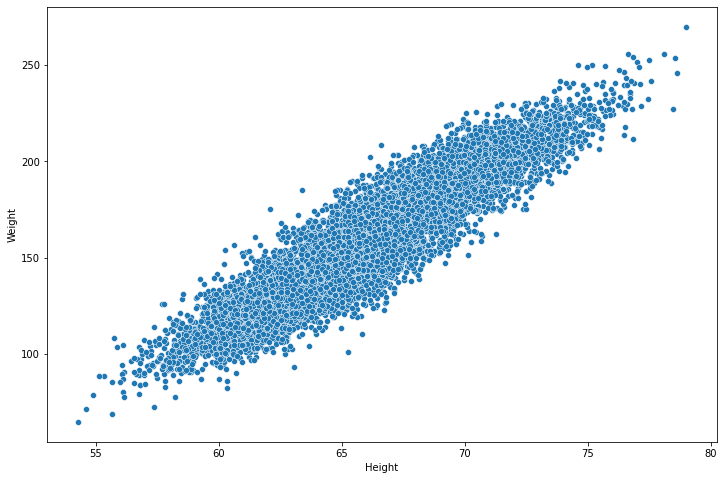

In [57]:
plt.figure(figsize=(12, 8))
# your answer here
sns.scatterplot(x='Height', y='Weight', data=df)

### Do the same plot, but color the markers by Gender

<AxesSubplot:xlabel='Height', ylabel='Weight'>

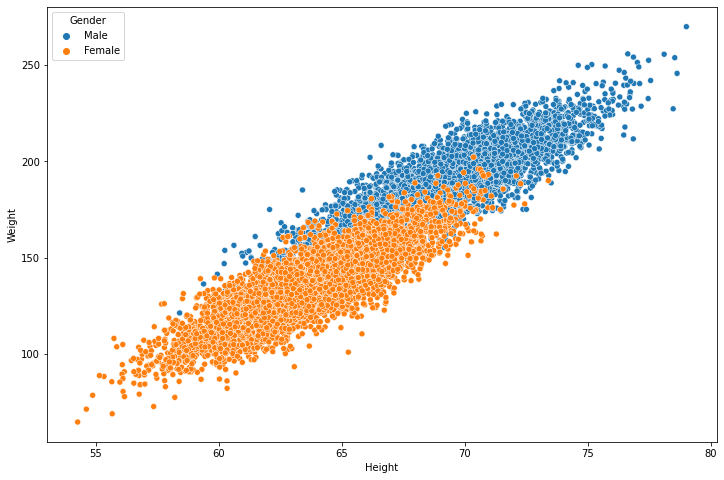

In [58]:
plt.figure(figsize=(12, 8))
# your answer here
sns.scatterplot(x='Height', y='Weight', data=df, hue='Gender')

### Which insights hue'ing the plot using the variable Gender has brought to you? 

Men can reach higher values of height and weight than women.

### Create a variable called `gender_groupby` to group data by `Gender`. However, don't define any aggregations yet. 

Just perform the groupby operation.

In [59]:
# your code here
gender_groupby = df.groupby('Gender')

#### Run `gender_groupby.head()` to check the groups obtained.

In [62]:
# your answer here
gender_groupby.head()

Gender     Height      Weight        Money
0       Male  73.847017  241.893563    21.462754
1       Male  68.781904  162.310473    94.732358
2       Male  74.110105  212.740856   130.077362
3       Male  71.730978  220.042470   214.096064
4       Male  69.881796  206.349801   765.091245
5000  Female  58.910732  102.088326    25.530452
5001  Female  65.230013  141.305823   270.612186
5002  Female  63.369004  131.041403  1114.256936
5003  Female  64.479997  128.171511  2194.127692
5004  Female  61.793096  129.781407   462.814462

#### Run gender_groupby.describe().T to check the statistics for each group. 

_hint: You can transpose this result to obtain a better visualization of the results_


In [65]:
# your answer here
gender_groupby.describe().T

Gender             Female          Male
Height count  5000.000000  5.000000e+03
       mean     63.708774  6.902635e+01
       std       2.696284  2.863362e+00
       min      54.263133  5.840690e+01
       25%      61.894441  6.717468e+01
       50%      63.730924  6.902771e+01
       75%      65.563565  7.098874e+01
       max      73.389586  7.899874e+01
Weight count  5000.000000  5.000000e+03
       mean    135.860093  1.870206e+02
       std      19.022468  1.978115e+01
       min      64.700127  1.129029e+02
       25%     122.934096  1.738878e+02
       50%     136.117583  1.870335e+02
       75%     148.810926  2.003578e+02
       max     202.237214  2.699897e+02
Money  count  5000.000000  5.000000e+03
       mean    751.959852  5.103531e+02
       std     860.718215  7.276870e+02
       min       0.004195  1.735664e-07
       25%     162.499271  4.864892e+01
       50%     453.032412  2.320123e+02
       75%    1015.017353  6.670731e+02
       max    7347.139257  8.168216e+03

The results above should give you some insights of the effect of gender on your dataset both visually and numerically.

## Distribution plots

### Verifying the distribution of your variables for each Gender.

We have seen that each variable in our dataset has its own "DNA". This is the distribution of each variable. However, the story does not stop there. Each variable has peculiarities within it and it is our job as data analyst to discover it. We'll see futurely that what `machine learning models` mostly do for us is automate this process (if we understand them, of course) 

In this case, specifically, we want to understand the effect of our `Gender` variable on the distribution of our dataset.


### First, plot the distribution of the `Height` variable again.

<AxesSubplot:>

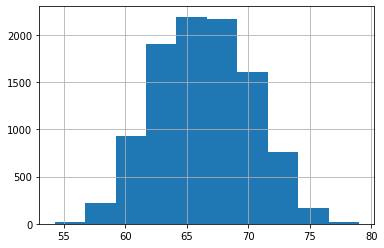

In [68]:
# your answer here
df['Height'].hist()

### Now, filter your dataset for each gender. Create a dataframe called `men` and another called `women` and plot the `Height` distribution for each of them in the same plot.

In [69]:
# your answer here
df_men = df[df['Gender'] == 'Male']
df_women = df[df['Gender'] == 'Female']

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

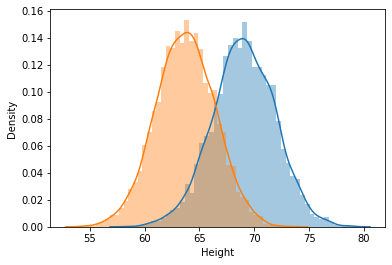

In [71]:
sns.distplot(df_men.Height)
sns.distplot(df_women.Height)

### What insights could you observe from that? What is the impact of `Gender` on `Height`

In [73]:
# your answer here

**Extra Note:** The issue: https://github.com/mwaskom/seaborn/issues/861 has a discussion of why distplot doesn't have a `hue` argument and how to overcome it (look for FacetGrid)

Try to do the same for the `Money` variable. What is the impact of `Gender` on `Money` ?

_Hint: for the Money variable, try specifying `hist=False`_


C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Money', ylabel='Density'>

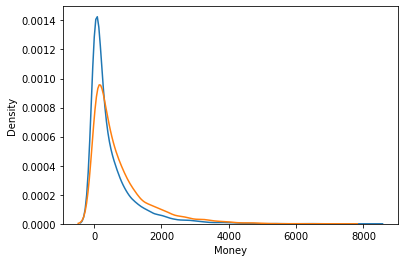

In [75]:
# your answer here
sns.distplot(df_men.Money, hist = False)
sns.distplot(df_women.Money, hist = False)

Comparing the concentration of money between men and  women, the women is little more distributed (lesse concentrated) than for men. But still it is very right skewed.

## Boxplot 

### Gender vs Height

Plot the boxplot considering the x-axis as `Gender` and y-axis as `Height`

<AxesSubplot:xlabel='Gender', ylabel='Height'>

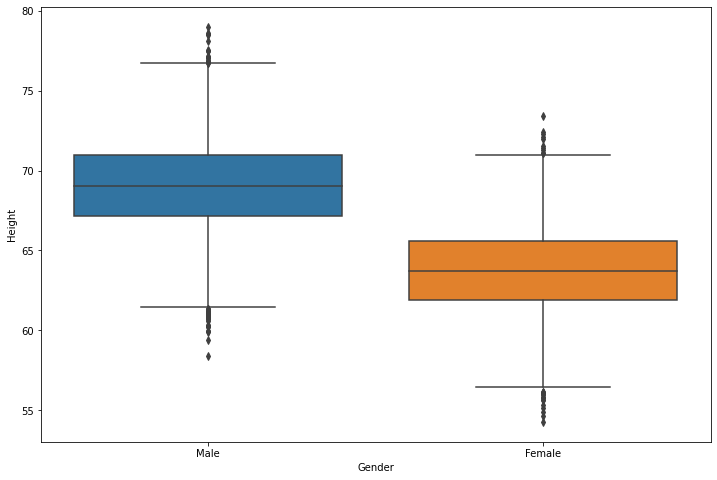

In [76]:
plt.figure(figsize=(12, 8))
# your answer here
sns.boxplot(data=df, x='Gender', y='Height')

### Gender vs Money

<AxesSubplot:xlabel='Gender', ylabel='Money'>

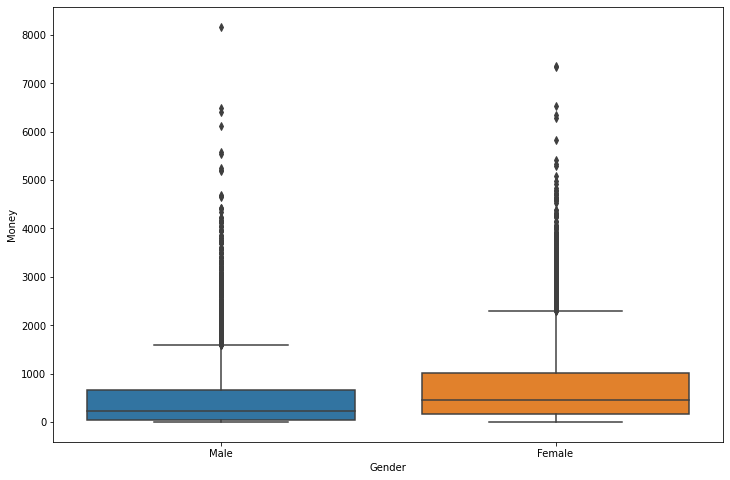

In [77]:
plt.figure(figsize=(12, 8))
# your answer here
sns.boxplot(data=df, x='Gender', y='Money')

From the conclusions of the previous exercises, did you expect the bloxplots to be like the ones above?

Yes

### Multivariate Analysis

Use `sns.pairplot` to see some combinations obtained so far. Use `hue = 'Gender`. 

Note that in a real problem, pairplot starts to get messy since there can be countless number of variables in a dataset. Use it wisely.

Usually people only plot this graph and don't take any conclusions from it. Don't fall into that trap. 

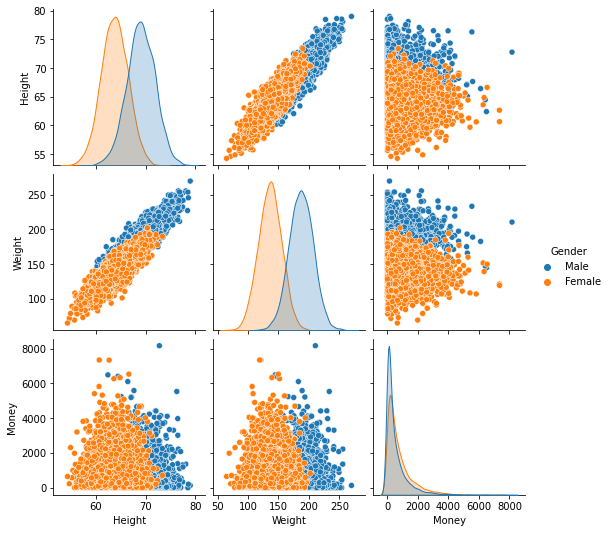

In [78]:
# your answer here
sns.pairplot(data=df, hue='Gender')